In [5]:
# https://github.com/e9t/nsmc

In [6]:
import io
import numpy
import matplotlib.pyplot as plt
import numpy as np
import re
import math
%matplotlib inline

In [10]:
special_chars_remover = re.compile("[^\w'|_]")

def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

In [11]:
def read_data():
    training_sentences = [[], []]
    
    '''
    숙제 1
    여기서 파일을 읽어 training_sentences에 저장합니다.
    '''
    
    return [' '.join(training_sentences[0]), ' '.join(training_sentences[1])]

In [12]:
def create_BOW(sentence):
    bow = {}
    
    '''
    숙제 2
    이전 실습과 동일하게 bag of words를 만듭니다.
    '''

    return bow

In [13]:
def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)

    '''
    숙제 3
    training_sentence로 만들어진 모델이,
    testing_sentence를 만들어 낼 **로그 확률** 을 구합니다.
    일반 숫자에서 로그값을 만들기 위해서는 math.log() 를 사용합니다.
    
    일반 숫자에서의 곱셈이 로그에서는 덧셈, 나눗셈은 뺄셈이 된다는 점에 유의하세요.
    예) 3 * 5 = 15
        log(3) + log(5) = log(15)
        
        5 / 2 = 2.5
        log(5) - log(2) = log(2.5)
    '''

    return logprob

In [14]:
def normalize_log_prob(prob1, prob2):
    
    '''
    숙제 4
    로그로 된 확률값을 표준화합니다.
    이 부분은 이미 작성되어 있습니다.
    '''
    
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

In [15]:
def naive_bayes(training_sentences, testing_sentence):
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

In [16]:
def visualize_boxplot(title, values, labels):
    width = .35

    print(title)
    
    fig, ax = plt.subplots()
    ind = numpy.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')

    autolabel(rects)

    plt.show()

어설픈 연기들로 몰입이 전혀 안되네요


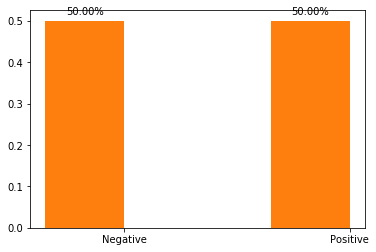

In [17]:
training_sentences = read_data()
testing_sentence = "어설픈 연기들로 몰입이 전혀 안되네요"
prob_pair = naive_bayes(training_sentences, testing_sentence)

plot_title = testing_sentence
if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
visualize_boxplot(plot_title,
              list(prob_pair),
              ['Negative', 'Positive'])